In [4]:
from typing import Dict, TypedDict
from langgraph.graph import StateGraph, START, END

In [5]:
class AgentState(TypedDict):
    number1: int 
    operation: str
    number2: int 
    finalNumber: int

In [7]:
def adder(state: AgentState) -> AgentState:
    """ This node add the 2 numbers """
    state['finalNumber'] = state['number1'] + state['number2']
    return state


def subtracor(state: AgentState) -> AgentState:
    """ This node subtracts the 2 numbers """
    state['finalNumber'] = state['number1'] - state['number2']
    return state

def decide_next_node(state: AgentState) -> AgentState:
    """ This node will select the next node of th graph """
    if state['operation'] == "+":
       return "addition_operation"
    
    elif state['operation'] == "-":
        return "subtract_operation"
    

In [21]:
graph = StateGraph(AgentState)
graph.add_node("add_node",adder)
graph.add_node("subtract_node",subtracor)
graph.add_node("router", lambda state:state)

graph.add_edge(START , "router")
graph.add_conditional_edges(
    "router",
    decide_next_node,
    {
        "addition_operation":"add_node",
        "subtract_operation":"subtract_node"
    }
)

graph.add_edge("add_node",END)
graph.add_edge("subtract_node",END)

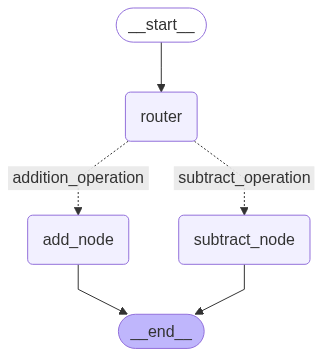

In [22]:
app  = graph.compile()

from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))



In [23]:
initial_state_1 = AgentState(number1=23,number2=11, operation= "+")
print(app.invoke(initial_state_1))

{'number1': 23, 'operation': '+', 'number2': 11, 'finalNumber': 34}
